In [3]:
# setup
import io
import base64
import sys
sys.path.append('/u/nrahman/workspace/nada/branches/pynada/')
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib as mpl
import numpy as np
import h5py
import scipy as sp
import pandas as pd
import sklearn as sk 

%reload_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

mpl.rcParams['text.usetex'] = 'True'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1.2
mpl.rcParams['ytick.minor.width'] = 1.2
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.serif'] = 'Computer Modern'

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#ad494a'
violet = '#9467bd'
brown = '#8c564b'

# w3schools

2.5012872825199493 2.0780375415585133 1.4415399895800718 4.495326256573708
4.996505509320173 0.9957133754304975 0.9978543858852842 6.870237905483298


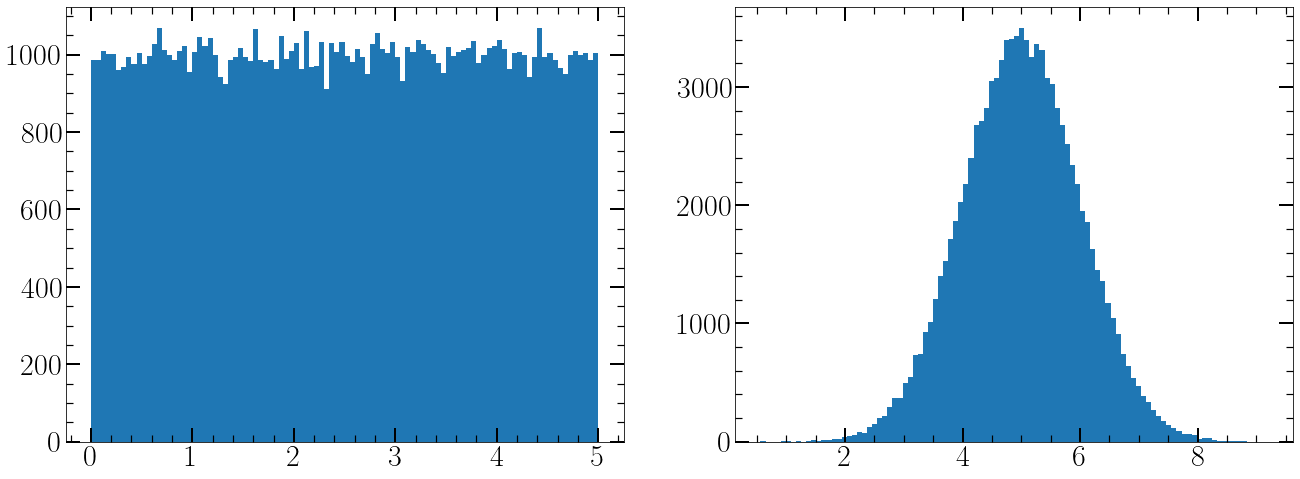

In [3]:
# data distribution
x_uni = np.random.uniform(0.0, 5.0, 100000)
x_nor = np.random.normal(5.0, 1.0, 100000)

print(x_uni.mean(), x_uni.var(), x_uni.std(), np.percentile(x_uni, 90))
print(x_nor.mean(), x_nor.var(), x_nor.std(), np.percentile(x_nor, 97))

mpl.rcParams["figure.figsize"] = 22, 8

plt.subplot(1, 2, 1)
plt.hist(x_uni, 100)

plt.subplot(1, 2, 2)
plt.hist(x_nor, 100)

plt.show()

-1.7512877115526118 103.10596026490066 -0.758591524376155 85.59308314937454


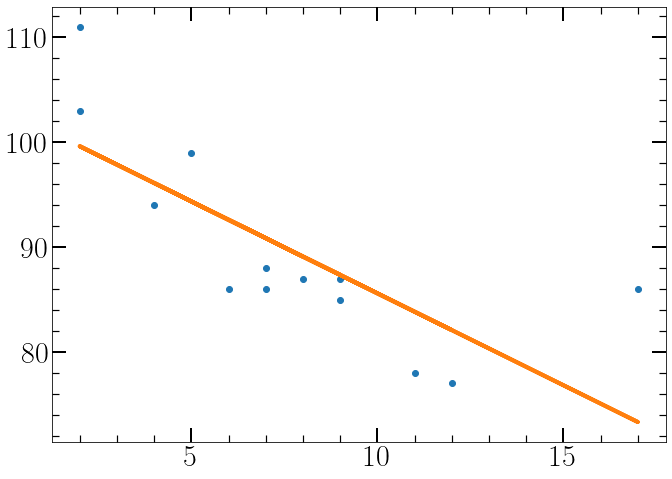

In [4]:
# linear fit
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

# x = np.array([89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40])
# y = np.array([21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15])

slope, intercept, r, p, std_err = sp.stats.linregress(x, y)
print(slope, intercept, r, slope * 10 + intercept)
y_fit = slope * x + intercept

# x = np.random.normal(5.0, 1.0, 1000)
# y = np.random.normal(10.0, 2.0, 1000)

mpl.rcParams["figure.figsize"] = 11, 8
plt.scatter(x, y)
plt.plot(x, y_fit, color=orange)
plt.show()

0.9432150416451026


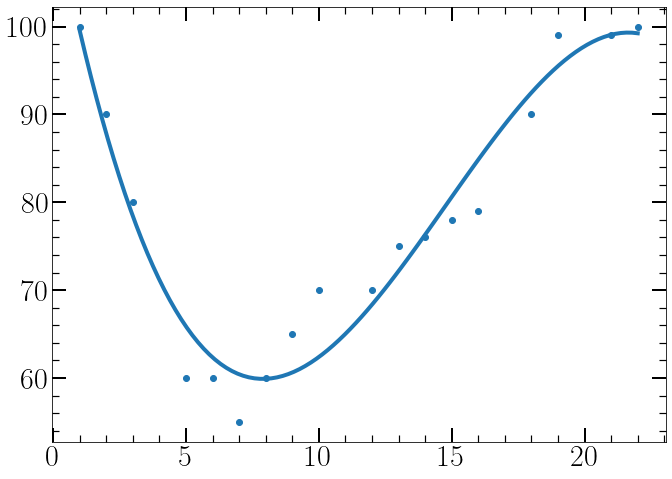

In [5]:
# polynomial fit
# from sklearn.metrics import r2_score

x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

# x = np.array([89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40])
# y = np.array([21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15])

model = np.poly1d(np.polyfit(x, y, 3))

x_fit = np.linspace(1, 22, 100)
y_fit = model(x_fit)
r2 = 1-(((y-model(x))**2).sum()/((y-y.mean())**2).sum())
print(r2)

# print(r2_score(y, y_fit)) 

mpl.rcParams["figure.figsize"] = 11, 8
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show() 

In [25]:
# read csv
df = pd.read_csv("data.csv") 
X = df[['Weight', 'Volume']]
y = df['CO2']
print(df[['Car', 'Model', 'Weight', 'Volume', 'CO2']])

           Car       Model  Weight  Volume  CO2
0       Toyoty        Aygo     790    1000   99
1   Mitsubishi  Space Star    1160    1200   95
2        Skoda      Citigo     929    1000   95
3         Fiat         500     865     900   90
4         Mini      Cooper    1140    1500  105
5           VW         Up!     929    1000  105
6        Skoda       Fabia    1109    1400   90
7     Mercedes     A-Class    1365    1500   92
8         Ford      Fiesta    1112    1500   98
9         Audi          A1    1150    1600   99
10     Hyundai         I20     980    1100   99
11      Suzuki       Swift     990    1300  101
12        Ford      Fiesta    1112    1000   99
13       Honda       Civic    1252    1600   94
14      Hundai         I30    1326    1600   97
15        Opel       Astra    1330    1600   97
16         BMW           1    1365    1600   99
17       Mazda           3    1280    2200  104
18       Skoda       Rapid    1119    1600  104
19        Ford       Focus    1328    20

In [36]:
# fit multi-D data
regr = sk.linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[0.00755095 0.00780526]
[107.2087328]
[114.75968007]


In [35]:
# data multi-D scaled data
scale = sk.preprocessing.StandardScaler()
scaledX = scale.fit_transform(X)
# print(scaledX)

regr = sk.linear_model.LinearRegression()
regr.fit(scaledX, y)
print(regr.coef_)

scaled = scale.transform([[2300, 1300]])
# print(scaled)

predictedCO2 = regr.predict(scaled)
print(predictedCO2)

scaled = scale.transform([[3300, 1300]])
# print(scaled)

predictedCO2 = regr.predict(scaled)
print(predictedCO2)

[1.80269333 2.99358608]
[107.2087328]
[114.75968007]


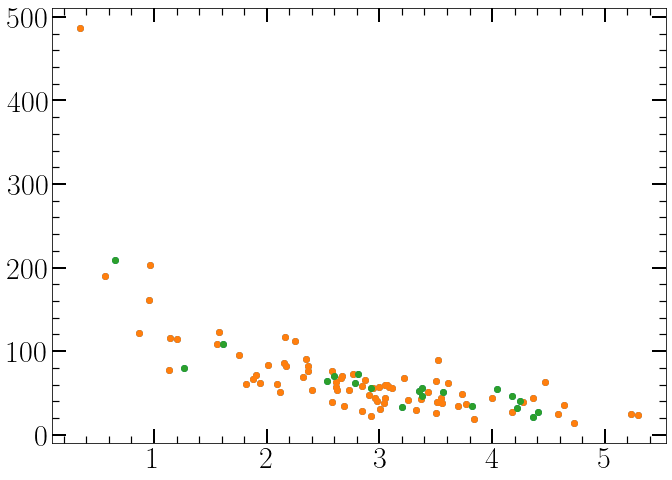

In [52]:
# train/test data
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mpl.rcParams["figure.figsize"] = 11, 8
plt.scatter(x, y)
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

0.7988645544629797
0.8086921460343596


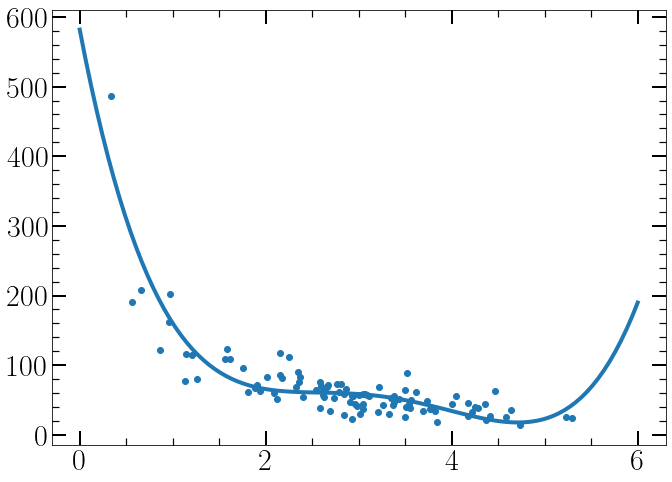

In [53]:
# model
model = np.poly1d(np.polyfit(train_x, train_y, 4))
x_fit = np.linspace(0, 6, 100)
y_fit = model(x_fit)
r2 = sk.metrics.r2_score(train_y, model(train_x))
print(r2)

r2 = sk.metrics.r2_score(test_y, model(test_x))
print(r2)

mpl.rcParams["figure.figsize"] = 11, 8
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES
[0]
[1]
[1]


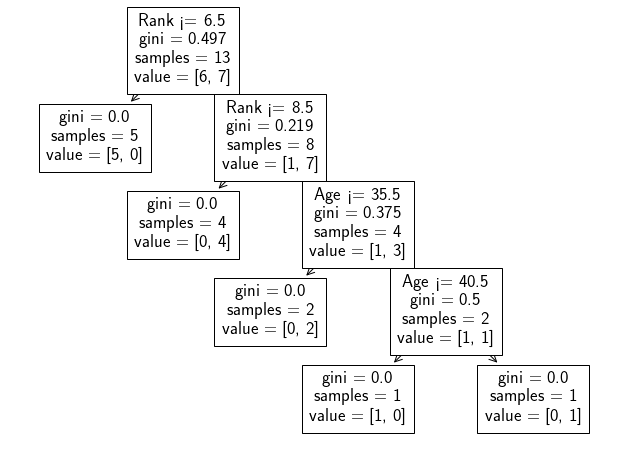

In [135]:
# decision Tree
df = pd.read_csv("data_2.csv")
print(df)

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
# print(df) 

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

# print(X)
# print(y)

dtree = sk.tree.DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

# prediction
print(dtree.predict([[36, 10, 9, 0]]))
print(dtree.predict([[43, 21, 8, 1]]))
print(dtree.predict([[35, 5, 9, 2]]))

In [166]:
# confusion matrix
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)
confusion_matrix = sk.metrics.confusion_matrix(actual, predicted) 

cm_display = sk.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

Accuracy = sk.metrics.accuracy_score(actual, predicted)
Precision = sk.metrics.precision_score(actual, predicted)
Sensitivity_recall = sk.metrics.recall_score(actual, predicted)
Specificity = sk.metrics.recall_score(actual, predicted, pos_label=0)
F1_score = sk.metrics.f1_score(actual, predicted)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.832, 'Precision': 0.9133333333333333, 'Sensitivity_recall': 0.9013157894736842, 'Specificity': 0.11363636363636363, 'F1_score': 0.9072847682119205}


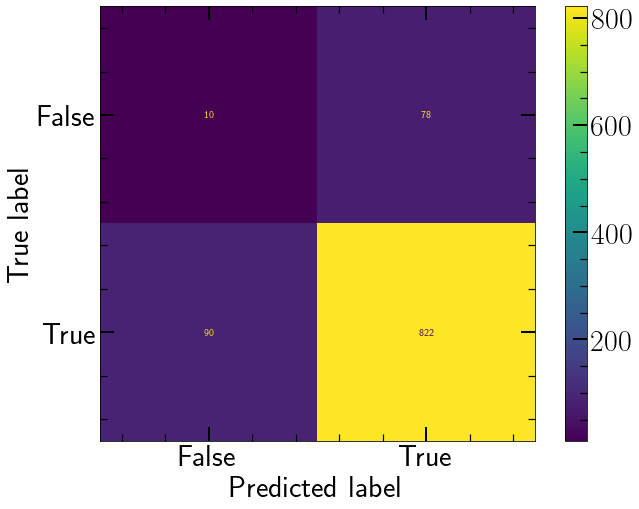

In [167]:
# plot
mpl.rcParams["figure.figsize"] = 11, 8
cm_display.plot()
plt.show() 

# Data preprocessing, geeksforgeeks

In [10]:
# Load the necessary libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 

# Load the iris dataset 
df = pd.read_csv('iris.csv') 

# Split the data into features and labels 
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] 
y = df['variety'] 

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create an SVM model and train it 
model = SVC()
model.fit(X_train, y_train) 

# prediction
y_pred = model.predict(X_test)
# print(X_test, y_pred)

# Evaluate the model on the test data 
accuracy = model.score(X_test, y_test) 

print('Test accuracy:', accuracy)

Test accuracy: 1.0


## data level

In [2]:
# data level
import numpy as np 
import pandas as pd
from sklearn import preprocessing 
  
# Import dataset 
df = pd.read_csv('iris.csv') 
  
print(df['variety'].unique())
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['variety'] = label_encoder.fit_transform(df['variety']) 
  
print(df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']
[0 1 2]


## data cleaning

In [39]:
# Data reading
import pandas as pd
import numpy as np
 
# Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

# df.duplicated()

df.info()

# display(df.to_string())

# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

df[cat_col].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [40]:
# Data cleaning
df1 = df.drop(columns=['Name','Ticket'])
print(round((df1.isnull().sum()/df1.shape[0])*100,2))

df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
# df2.head()

# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
print(df3.isnull().sum())

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


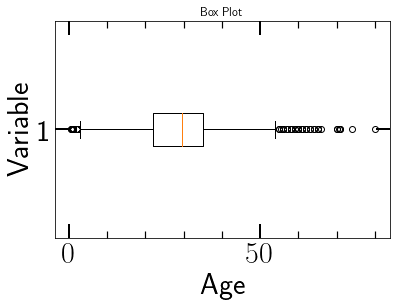

In [41]:
# plot
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [38]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]
df4.info()

Lower Bound : 3.705400107925538
Upper Bound : 55.57878528533267
<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  821 non-null    int64  
 1   Survived     821 non-null    int64  
 2   Pclass       821 non-null    int64  
 3   Sex          821 non-null    object 
 4   Age          821 non-null    float64
 5   SibSp        821 non-null    int64  
 6   Parch        821 non-null    int64  
 7   Fare         821 non-null    float64
 8   Embarked     821 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 64.1+ KB


## data scaling

In [98]:
# data scaling
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
 

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


## one hot encoding

In [89]:
#one hot encoding using OneHotEncoder of Scikit-Learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Building a dummy employee dataset for example
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
#Converting into a Pandas dataframe
df = pd.DataFrame(data)
#Print the dataframe:
print(f"Employee data : \n{df}")

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder = OneHotEncoder()

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


## Handling Imbalanced Data

In [129]:
# Handling Imbalanced Data
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
  
# load the data set 
data = pd.read_csv('creditcard.csv') 
  
# print info about columns in the dataframe 
# print(data.info())
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
# normalise the amount column 
# data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 
data['normAmount'] = StandardScaler().fit_transform(data[['Amount']]) 
  
# drop Time and Amount columns as they are not relevant for prediction purpose  
data = data.drop(['Time', 'Amount'], axis = 1) 
  
# as you can see there are 492 fraud transactions. 
print(data['Class'].value_counts())
data.head()

0    284315
1       492
Name: Class, dtype: int64


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [150]:
# train
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = data.drop(['Class'], axis = 1)
y = data[['Class']]
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

 
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train)
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# over sampling
print("Before OverSampling, counts of label '1': {}".format(np.sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(np.sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(np.sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(np.sum(y_train_res == 0))) 

# Logistic Regression
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

In [ ]:
# undersampling 
print("Before Undersampling, counts of label '1': {}".format(np.sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(np.sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(np.sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(np.sum(y_train_miss == 0))) 

 # train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report
print(classification_report(y_test, predictions)) 

# Regression and classification

## Ordinary Least Squares 

In [3]:
# Ordinary Least Squares 
import statsmodels.api as sm
import pandas as pd
 
# reading data from the csv
data = pd.read_csv('train.csv')
 
# defining the variables
x = data['x'].tolist()
y = data['y'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.33e-294
Time:                        21:50:28   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

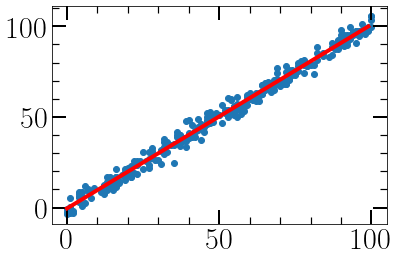

In [6]:
# plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# reading data from the csv
data = pd.read_csv('train.csv')
 
# plotting the original values
x = data['x'].tolist()
y = data['y'].tolist()
plt.scatter(x, y)
 
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = data['x'].max()
min_x = data['x'].min()
 
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
 
# the substituted equation
y = 1.0143 * x - 0.4618
 
# plotting the regression line
plt.plot(y, 'r')
plt.show()

In [19]:
# function
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return (b_0, b_1)

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m",  marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g")

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')
    
def main(): 
    # observations / data 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

    # estimating coefficients 
    b = estimate_coef(x, y)
    plot_regression_line(x, y, b)
    print(b)
    print("Estimated coefficients:b_0 =", b[0])
    print("Estimated coefficients:b_1 =", b[1])

(1.2363636363636363, 1.1696969696969697)
Estimated coefficients:b_0 = 1.2363636363636363
Estimated coefficients:b_1 = 1.1696969696969697


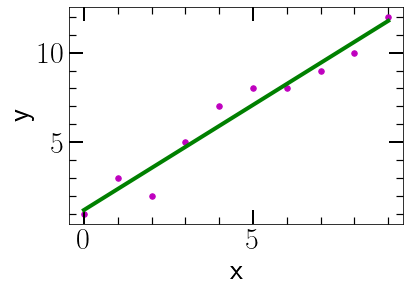

In [20]:
# Simple Linear Regression
main()

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661758


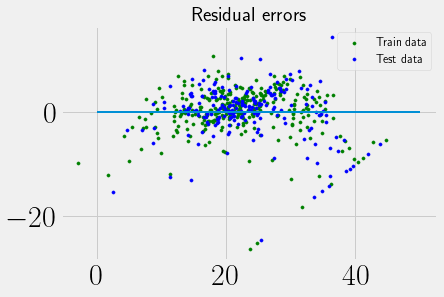

In [72]:
# Multiple Linear Regression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) 
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train)

# regression coefficients 
print('Coefficients: ', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error 

# setting plot style 
plt.style.use('fivethirtyeight') 

# plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color="green", s=10, label='Train data') 

# plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color="blue", s=10, label='Test data') 

# plotting line for zero residual error 
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2) 

# plotting legend 
plt.legend(loc='upper right') 

# plot title 
plt.title("Residual errors") 

# method call for showing the plot 
plt.show() 

Coefficients:  [80878.78787879]
Variance score: 0.6690412331929895
Coefficients:  [      0.         -132871.21212121   19431.81818182]
Variance score: 0.9162082221443943
Coefficients:  [     0.         180664.33566432 -48548.95104895   4120.04662005]
Variance score: 0.9812097727913367


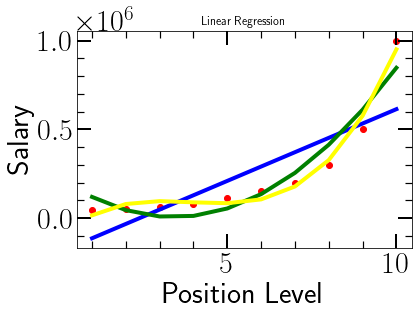

In [203]:
# Polynomial Linear Regression
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import warnings 
  
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score 
  
warnings.filterwarnings('ignore') 
  
df = pd.read_csv('Position_Salaries.csv') 
  
X = df.iloc[:,1:2].values 
y = df.iloc[:,2].values

   
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression() 
lin_reg.fit(X,y)
   
# regression coefficients 
print('Coefficients: ', lin_reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(lin_reg.score(X, y)))

from sklearn.preprocessing import PolynomialFeatures 
poly_reg2=PolynomialFeatures(degree=2) 
X_poly=poly_reg2.fit_transform(X) 
lin_reg_2=LinearRegression() 
lin_reg_2.fit(X_poly,y)
print('Coefficients: ', lin_reg_2.coef_) 
print('Variance score: {}'.format(lin_reg_2.score(X_poly, y)))

poly_reg3=PolynomialFeatures(degree=3) 
X_poly3=poly_reg3.fit_transform(X) 
lin_reg_3=LinearRegression() 
lin_reg_3.fit(X_poly3,y)
print('Coefficients: ', lin_reg_3.coef_) 
print('Variance score: {}'.format(lin_reg_3.score(X_poly3, y)))

# plot  
plt.scatter(X,y,color='red') 
plt.plot(X,lin_reg.predict(X),color='blue')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='green') 
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='yellow') 
plt.title('Linear Regression') 
plt.xlabel('Position Level') 
plt.ylabel('Salary') 
plt.show()

In [83]:
# Multiple Polynomial Linear Regression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures 

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) 
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train)

# regression coefficients 
print('Coefficients: ', reg.coef_) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

poly_reg2=PolynomialFeatures(degree=2) 
X_poly_train = poly_reg2.fit_transform(X_train)
X_poly_test = poly_reg2.fit_transform(X_test)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)
print('Coefficients: ', lin_reg_2.coef_) 
print('Variance score: {}'.format(lin_reg_2.score(X_poly_test, y_test)))

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661758
Coefficients:  [ 1.79002516e-07 -3.17413624e+00  5.55223673e-01 -4.73116023e+00
  1.86255573e+01  2.00648973e+02  1.55062802e+01  7.98040712e-01
 -6.06305687e+00  2.37933177e+00 -2.98717223e-03  5.56145521e+00
  1.10632185e-01  2.19890485e+00  3.51661721e-03 -1.26767450e-02
 -1.65626789e-01  1.60295321e+00 -1.91719904e+00  4.09784534e-01
 -7.55310390e-03 -1.90692927e-01 -3.30178105e-01  2.01910850e-02
 -1.52313591e-02 -1.58397662e-04  2.69861726e-02 -1.21739733e-04
 -6.95086111e-03 -1.74119670e-01 -1.90921148e+00 -2.88893360e-03
  1.17390539e-03 -3.30076748e-02 -7.03984227e-04  3.77965279e-04
  1.84839257e-02  3.41558514e-04 -6.40529749e-03  2.12410138e-02
 -2.23625058e-01  2.82684105e+00  1.22245097e-01  2.92400608e-03
  1.971

## Bayesian Regression

In [93]:
# Multiple Polynomial Linear Regression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) 
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.BayesianRidge(verbose=True) 
reg.fit(X_train, y_train)

# regression coefficients 
print('Coefficients: ', reg.coef_) 
# variance score: 1 means perfect prediction 
print('R2: {}'.format(reg.score(X_train, y_train)))
print('R2: {}'.format(reg.score(X_test, y_test)))

# print(reg.get_params())

Convergence after  11  iterations
Coefficients:  [-0.08337712  0.07426607 -0.02292389  1.03286029 -0.86591839  3.05165461
 -0.00410665 -1.10947808  0.28188429 -0.01488359 -0.65041172  0.01050274
 -0.57922266]
R2: 0.7332038012363395
R2: 0.7029246583991491


## Quantile Regression

   Distance   Emission
0  5.939322  48.157776
1  7.436704  47.055279
2  6.424870  46.927725
3  5.903949  44.643314
4  4.812893  41.741076
                         QuantReg Regression Results                          
Dep. Variable:               Emission   Pseudo R-squared:               0.4222
Model:                       QuantReg   Bandwidth:                       4.434
Method:                 Least Squares   Sparsity:                        7.944
Date:                Wed, 01 May 2024   No. Observations:                   20
Time:                        00:00:49   Df Residuals:                       18
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5647      2.276     17.386      0.000      34.784      44.346
Distance       1.3042      0.343      3.806      0.001       0.584      

Text(0, 0.5, 'Emission Generated')

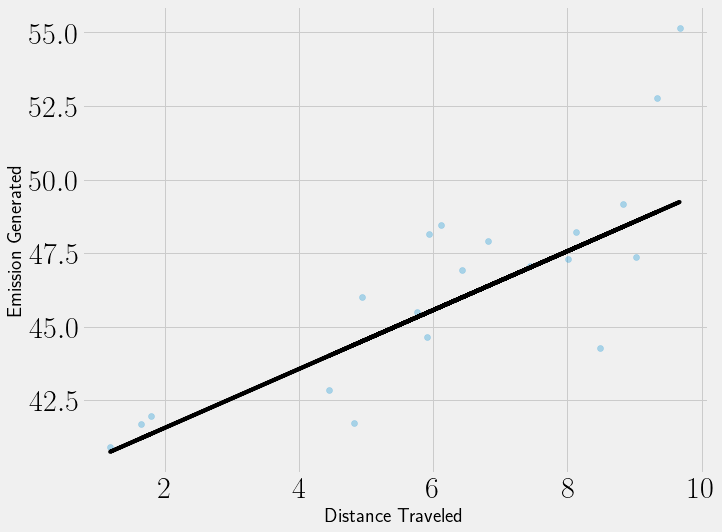

In [99]:
# Python program to visualize quantile regression

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)

# Number of rows
rows = 20

# Constructing Distance column
Distance = np.random.uniform(1, 10, rows)

# Constructing Emission column
Emission = 40 + Distance + np.random.normal(loc=0, scale=.25*Distance, size=20)

# Creating a dataset
df = pd.DataFrame({'Distance': Distance, 'Emission': Emission})

print(df.head())

# #fit the model
model = smf.quantreg('Emission ~ Distance', df).fit(q=0.7)

# view model summary
print(model.summary())

# define figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# get y values
y_line = lambda a, b: a + Distance
y = y_line(model.params['Intercept'], model.params['Distance'])

# Plotting data points with the help
# pf quantile regression equation
ax.plot(Distance, y, color='black')
ax.scatter(Distance, Emission, alpha=.3)
ax.set_xlabel('Distance Traveled', fontsize=20)
ax.set_ylabel('Emission Generated', fontsize=20)

# Save the plot
# fig.savefig('quantile_regression.png')

## Stepwise Regression

In [113]:
# forward stepwise
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_iris

# Define the array of data
# data = np.array([[1, 2, 3, 4],
# 				[5, 6, 7, 8],
# 				[9, 10, 11, 12]])

# Convert the array into a dataframe
# X, y = load_iris(return_X_y=True)

df = pd.read_csv('breast-cancer.csv')
y = df['diagnosis'] 
X = df.drop('diagnosis', axis = 1) 
X = X.drop('id', axis = 1)

# Perform stepwise regression
reg = linear_model.LogisticRegression()
sfs = SequentialFeatureSelector(reg,
								n_features_to_select=3,
								direction='forward',
								scoring='accuracy',
								cv=None)
sfs.fit(X, y)
print(sfs.get_support())
X_reduce = sfs.transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduce, y, test_size=0.2, random_state=1)

# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
print('R2: {}'.format(logreg.score(X_train, y_train)))
print('R2: {}'.format(logreg.score(X_test, y_test)))

# Make predictions using the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
# print(y_pred)

[ True False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False]
R2: 0.9582417582417583
R2: 0.9385964912280702


In [144]:
# forward stepwise
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_iris

# Define the array of data
data = np.array([[1, 2, 3, 4],
				[5, 6, 7, 8],
				[9, 10, 11, 12]])

# Convert the array into a dataframe
X, y = load_iris(return_X_y=True)

# Perform stepwise regression
knn = linear_model.LogisticRegression()
sfs = SequentialFeatureSelector(knn,
								n_features_to_select=3,
								direction='backward',
								scoring='accuracy',
								cv=None)
sfs.fit(X, y)
print(sfs.get_support())
X_reduce = sfs.transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduce, y, test_size=0.2, random_state=1)

# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
print('R2: {}'.format(logreg.score(X_train, y_train)))
print('R2: {}'.format(logreg.score(X_test, y_test)))

# Make predictions using the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
# print(y_pred)

[False  True  True  True]
R2: 0.975
R2: 0.9666666666666667


## Logistic Regression

In [170]:
# Binomial Logistic regression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)
print("Logistic Regression model precision(in %):", pre*100)
print("Logistic Regression model recall(in %):", rec*100)
print("Logistic Regression model f1(in %):", f1*100)

Logistic Regression model accuracy (in %): 94.73684210526315
Logistic Regression model precision(in %): 94.8051948051948
Logistic Regression model recall(in %): 97.33333333333334
Logistic Regression model f1(in %): 96.05263157894737


In [171]:
# Multinomial Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

# load the digit dataset
digits = datasets.load_digits()
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']], columns= digits['feature_names'] + ['target'])
# display(df)

# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.52294853963839


## Lasso Regression

Coefficients:  [0.]
Variance score: -3.448412441660923
Coefficients:  [0.82284666]
Variance score: -3.4487241662615986


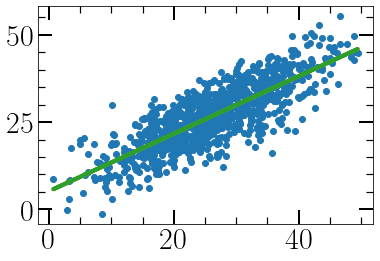

In [102]:
# Lasso Regression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures 

# load data
df = pd.read_csv('Experience-Salary.csv') 
  
X = df.iloc[:, :1].values
y = df.iloc[:, 1].values

# Regression
Lasso_reg = Lasso()
Lasso_reg.fit(X, y)
y_pred_lasso = reg.predict(X)
print('Coefficients: ', Lasso_reg.coef_) 
print('Variance score: {}'.format(Lasso_reg.score(X_test, y_test)))

reg = LinearRegression()
reg.fit(X, y)
y_pred_linear = reg.predict(X)
print('Coefficients: ', reg.coef_) 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

plt.scatter(X, y)
plt.plot(X, y_pred_lasso, color=orange)
plt.plot(X, y_pred_linear, color=green)
plt.show()

# KNN

In [123]:
# knn
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('breast-cancer.csv') 

# Separating the dependent and independent variable 
y = df['diagnosis'] 
X = df.drop('diagnosis', axis = 1) 
X = X.drop('id', axis = 1)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

K = [] 
training = [] 
test = [] 
scores = {} 

for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 

    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k)

    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score]

for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.9447236180904522, 0.9298245614035088]
3 : [0.9522613065326633, 0.9181286549707602]
4 : [0.9447236180904522, 0.9298245614035088]
5 : [0.9396984924623115, 0.9473684210526315]
6 : [0.9371859296482412, 0.9473684210526315]
7 : [0.9371859296482412, 0.9532163742690059]
8 : [0.9321608040201005, 0.9532163742690059]
9 : [0.9321608040201005, 0.9590643274853801]
10 : [0.9321608040201005, 0.9649122807017544]
11 : [0.9346733668341709, 0.9649122807017544]
12 : [0.9321608040201005, 0.9649122807017544]
13 : [0.9296482412060302, 0.9649122807017544]
14 : [0.9296482412060302, 0.9649122807017544]
15 : [0.9321608040201005, 0.9649122807017544]
16 : [0.9271356783919598, 0.9649122807017544]
17 : [0.9321608040201005, 0.9649122807017544]
18 : [0.9221105527638191, 0.9649122807017544]
19 : [0.9246231155778895, 0.9649122807017544]
20 : [0.9170854271356784, 0.9649122807017544]


   Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000
20 0.6833839918946303 0.36626668744480784


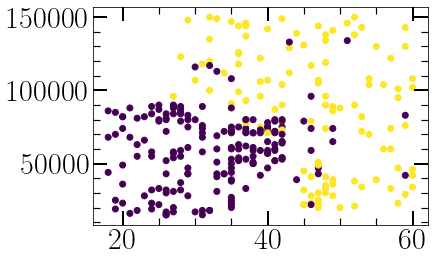

In [177]:
# knn regression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Importing the dataset 
df = pd.read_csv('Advertisement.csv') 

# object to label
label_encoder = preprocessing.LabelEncoder() 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

y = df['Purchased']
X = df.drop('Purchased', axis = 1)
X = X.drop('User ID', axis = 1)
print(X.head())

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 46)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print(k, knn.score(X_train, y_train), knn.score(X_test, y_test))

plt.scatter(X_train['Age'], X_train['EstimatedSalary'], c=y_train)
plt.show()

# Support vector machine

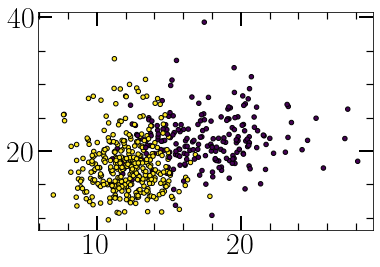

In [197]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)
y_pred = svm.predict(X)

# # Plot Decision Boundary
# PartialDependenceDisplay.from_estimator(
# 		svm,
# 		X,
# 		response_method="predict",
# 		cmap=plt.cm.Spectral,
# 		alpha=0.8,
# 		xlabel=cancer.feature_names[0],
# 		ylabel=cancer.feature_names[1],
# 	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
			c=y, 
			s=20, edgecolors="k")
plt.show()

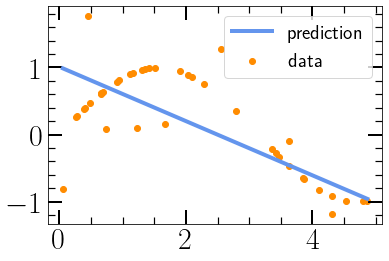

In [199]:
# linear SVR
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a linear kernel 
svr = SVR(kernel='linear') 

# train the model on the data 
svr.fit(X, y) 

# make predictions on the data 
y_pred = svr.predict(X) 

# plot the predicted values against the true values 
plt.scatter(X, y, color='darkorange', label='data') 
plt.plot(X, y_pred, color='cornflowerblue', label='prediction') 
plt.legend() 
plt.show() 

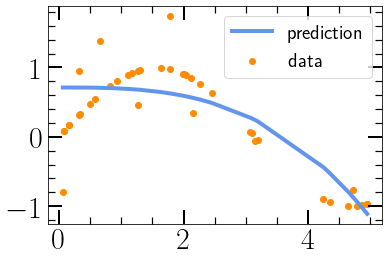

In [201]:
# poly
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a linear kernel 
svr = SVR(kernel='poly') 

# train the model on the data 
svr.fit(X, y) 

# make predictions on the data 
y_pred = svr.predict(X) 

# plot the predicted values against the true values 
plt.scatter(X, y, color='darkorange', label='data') 
plt.plot(X, y_pred, color='cornflowerblue', label='prediction') 
plt.legend() 
plt.show() 

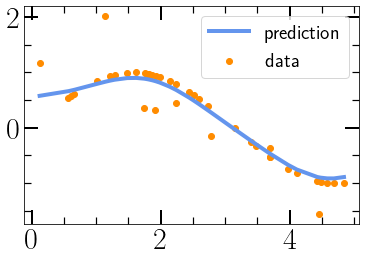

In [202]:
# rbf
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), 
			axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a linear kernel 
svr = SVR(kernel='rbf') 

# train the model on the data 
svr.fit(X, y) 

# make predictions on the data 
y_pred = svr.predict(X) 

# plot the predicted values against the true values 
plt.scatter(X, y, color='darkorange', 
			label='data') 
plt.plot(X, y_pred, color='cornflowerblue', 
		label='prediction') 
plt.legend() 
plt.show() 


In [213]:
# SVC
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
print("Logistic R2:", clf.score(X_test, y_test))

clf = SVC(kernel ='rbf', random_state = 0)
clf.fit(X_train, y_train)
print("rbf R2:", clf.score(X_test, y_test))

clf = SVC(kernel ='sigmoid', random_state = 0)
clf.fit(X_train, y_train)
print("sigmoid R2:", clf.score(X_test, y_test))

clf = SVC(kernel ='poly', random_state = 0)
clf.fit(X_train, y_train)
print("poly R2:", clf.score(X_test, y_test))

clf = SVC(kernel ='linear', random_state = 0)
clf.fit(X_train, y_train)
print("linear R2:", clf.score(X_test, y_test))

Logistic R2: 0.9473684210526315
rbf R2: 0.956140350877193
sigmoid R2: 0.5175438596491229
poly R2: 0.9473684210526315
linear R2: 0.9649122807017544


# Decision tree

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset: 
    0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Accuracy :  73.40425531914893
Results Using Entropy:
Accuracy :  70.74468085106383


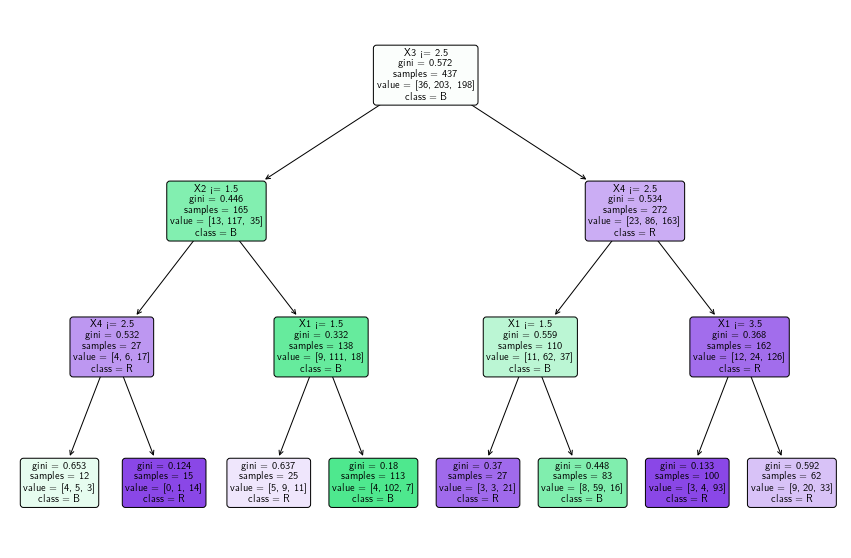

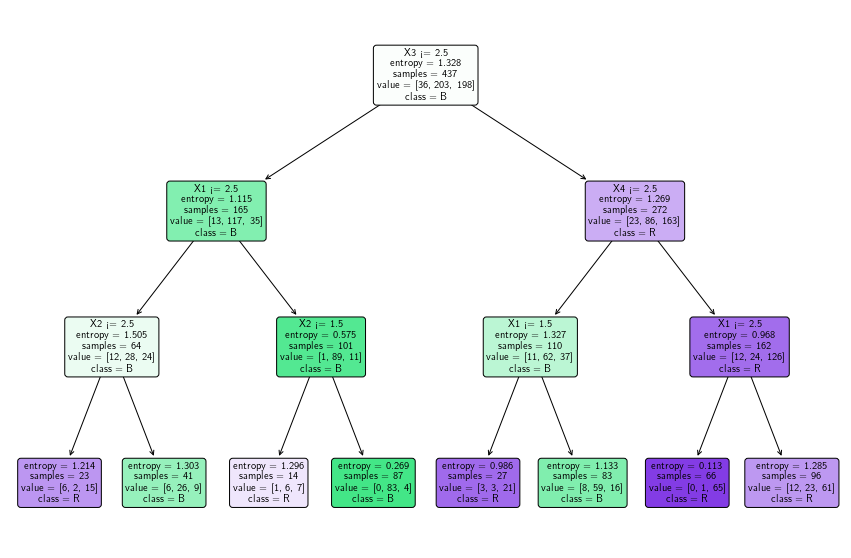

In [241]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Function to import the dataset
def importdata():
	balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-' + 'databases/balance-scale/balance-scale.data', sep=',', header=None)

	# Displaying dataset information
	print("Dataset Length: ", len(balance_data))
	print("Dataset Shape: ", balance_data.shape)
	print("Dataset: \n", balance_data.head())
	
	return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

	return X, Y, X_train, X_test, y_train, y_test

def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini

def train_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
	y_pred = clf_object.predict(X_test)
# 	print("Predicted values:")
# 	print(y_pred)
	return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
# 	print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
	print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
# 	print("Report : ", classification_report(y_test, y_pred))
    
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
	plt.figure(figsize=(15, 10))
	plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
	plt.show()
    
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    print("Results Using Gini Index:")
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)    

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

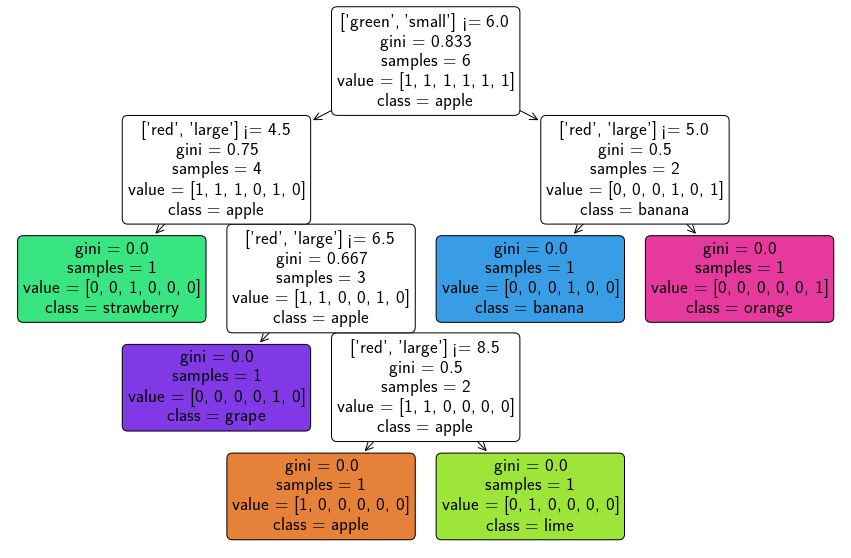

Predicted fruit type: apple


In [256]:
# CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the features and target variable
features = [
	["red", "large"],
	["green", "small"],
	["red", "small"],
	["yellow", "large"],
	["green", "large"],
	["orange", "large"],
]
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"]

# Flatten the features list for encoding
flattened_features = [item for sublist in features for item in sublist]

# Use a single LabelEncoder for all features and target variable
le = LabelEncoder()
le.fit(flattened_features + target_variable)

# Encode features and target variable
encoded_features = [le.transform(item) for item in features]
encoded_target = le.transform(target_variable)

# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(encoded_features, encoded_target)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=target_variable, rounded=True)
plt.show()

# Predict the fruit type for a new instance
new_instance = ["red", "large"]
encoded_new_instance = le.transform(new_instance)
predicted_fruit_type = clf.predict([encoded_new_instance])
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type)
print("Predicted fruit type:", decoded_predicted_fruit_type[0])

Predicted price:  8000



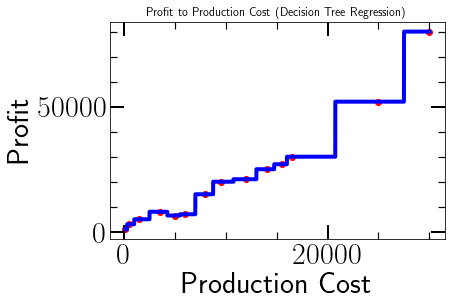

In [262]:
# regression
# import numpy package for arrays and stuff 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 


# import dataset 
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data 

dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int) 

regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y) 
y_pred = regressor.predict([[3750]]) 

# print the predicted price 
print("Predicted price: % d\n"% y_pred)

X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1)) 
plt.scatter(X, y, color = 'red') 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
plt.title('Profit to Production Cost (Decision Tree Regression)') 
plt.xlabel('Production Cost') 
plt.ylabel('Profit') 
plt.show()

plot_tree(regressor, filled=True, feature_names=X, class_names=y, rounded=True)

# Ensemble Methods

In [302]:
# Blending
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error 

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# importing train test split
from sklearn.model_selection import train_test_split

# loading train data set in dataframe from train_data.csv file
df = pd.read_csv("train.csv")

# getting target data from the dataframe
target = df['y']

# getting train data from the dataframe
train = df.drop('y', axis = 1)

#Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20)

# performing the train test and validation split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# performing train test split
x_train, x_test, y_train, y_test = train_test_split(
	train, target, test_size=1 - train_ratio)

# performing test validation split
x_val, x_test, y_val, y_test = train_test_split(
	x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

# initializing all the base model objects with default parameters
model_1 = LinearRegression()
model_3 = RandomForestRegressor()

# training all the model on the train dataset

# training first model
model_1.fit(x_train, y_train)
val_pred_1 = model_1.predict(x_val)
test_pred_1 = model_1.predict(x_test)

# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)

# training third model
model_3.fit(x_train, y_train)
val_pred_3 = model_1.predict(x_val)
test_pred_3 = model_1.predict(x_test)

# converting to dataframe
val_pred_3 = pd.DataFrame(val_pred_3)
test_pred_3 = pd.DataFrame(test_pred_3)

# concatenating validation dataset along with all the predicted validation data (meta features)
df_val = np.concatenate([x_val, val_pred_1, val_pred_3], axis=1)
df_test = np.concatenate([x_test, test_pred_1, test_pred_3], axis=1)

# making the final model using the meta features
final_model = LinearRegression()
final_model.fit(df_val, y_val)

# getting the final output
final_pred = final_model.predict(df_test)

#printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, final_pred))
print(final_model.score(df_test, y_test))

8.612510485688912
0.9871432197170246


Out-of-Bag Score: 0.6819214296245728
Mean Squared Error: 2384100000.0
R-squared: 0.9704434230386582


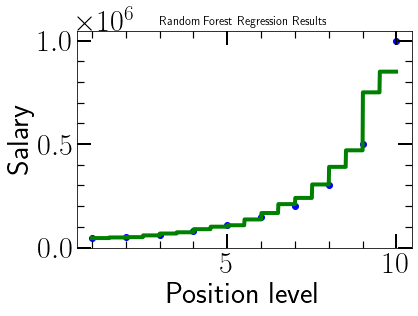

In [334]:
# Random Forest Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

df= pd.read_csv('Position_Salaries.csv')

X = df.iloc[:,1:2].values # features
y = df.iloc[:,2].values # Target variable

# Check for and handle categorical variables
# label_encoder = LabelEncoder()
# x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
# x_numerical = df.select_dtypes(exclude=['object']).values
# x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
# regressor = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
regressor.fit(X, y)
predictions = regressor.predict(X)

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Plot the decision tree
# tree_to_plot = regressor.estimators_[0]
# plt.figure(figsize=(20, 10))
# plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

In [351]:
# Ada Boost Classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingClassifier

df = pd.read_csv('breast-cancer.csv')
label_encoder = preprocessing.LabelEncoder() 
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
# print(df.head())

y = df['diagnosis'] 
X = df.drop('diagnosis', axis = 1) 
X = X.drop('id', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# RandomForestRegressor
print('RandomForestRegressor')
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# ExtraTreesClassifier
print('ExtraTreesClassifier')
regressor = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2, bootstrap=True, oob_score=True)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# AdaBoostClassifier
print('AdaBoostClassifier')
regressor = AdaBoostClassifier() 
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# GradientBoostingClassifier
print('GradientBoostingClassifier')
regressor = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

RandomForestRegressor
Out-of-Bag Score: 0.7812734884517438
Mean Squared Error: 0.03780701754385965
R-squared: 0.8457331240188384
ExtraTreesClassifier
Out-of-Bag Score: 0.9098901098901099
Mean Squared Error: 0.043859649122807015
R-squared: 0.8210361067503925
AdaBoostClassifier
Mean Squared Error: 0.043859649122807015
R-squared: 0.8210361067503925
GradientBoostingClassifier
Mean Squared Error: 0.03508771929824561
R-squared: 0.856828885400314


# Clustering